<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M4L3_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gradient Descent**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

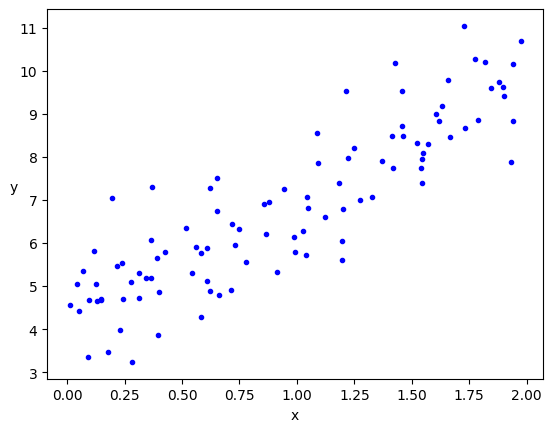

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

Cost Function

In [5]:
def cal_cost(y_pred, X, y):
    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

Gradients

In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

In [7]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


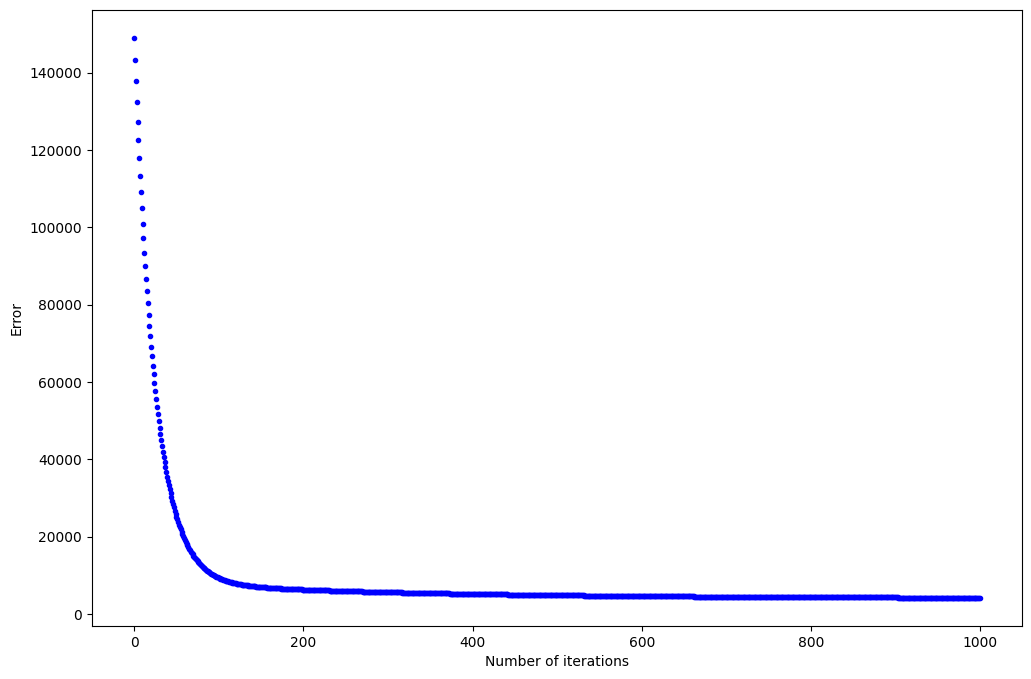

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

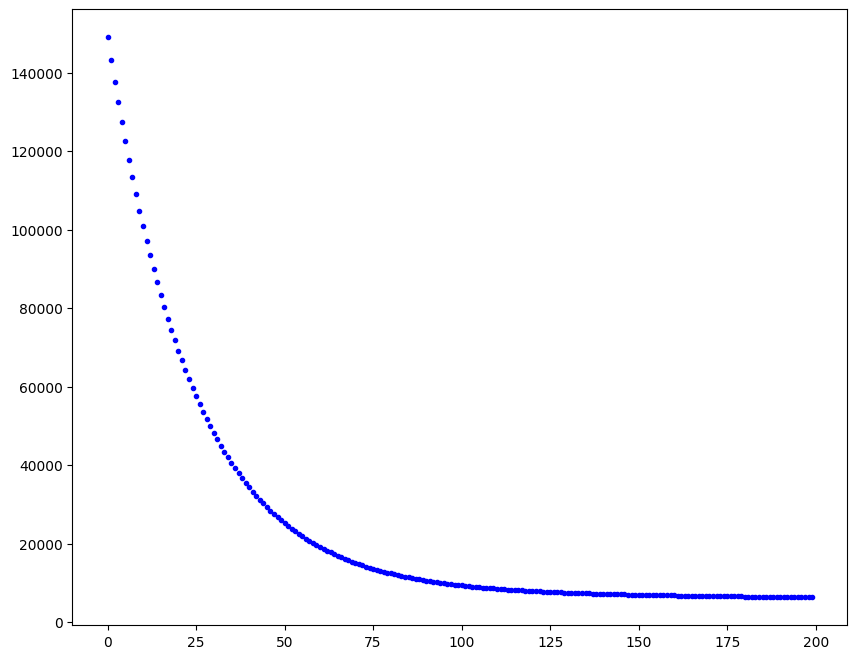

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

Stochastic Gradient Descent

In [10]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [11]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


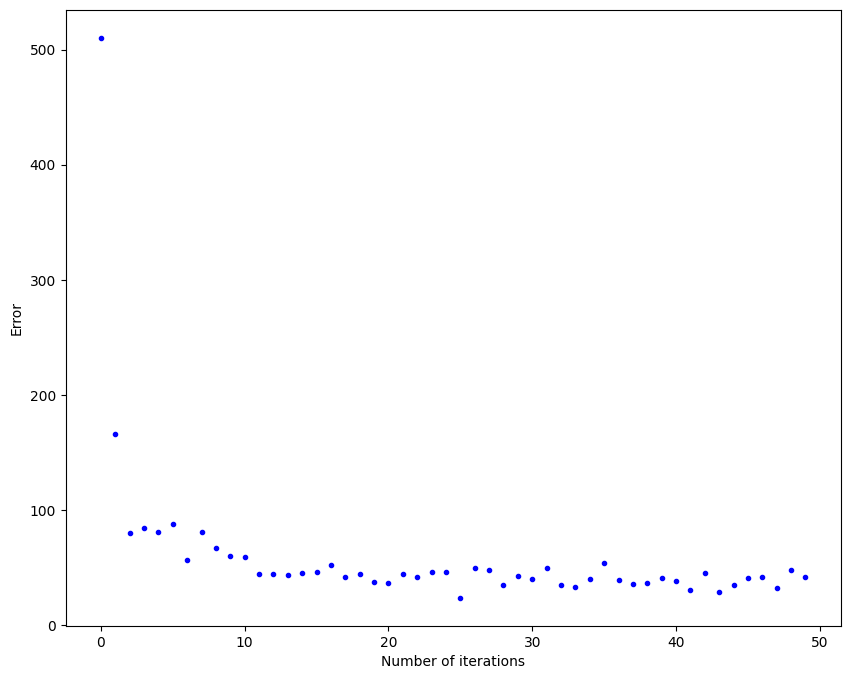

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Mini Batch Gradient Descent

In [13]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [14]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


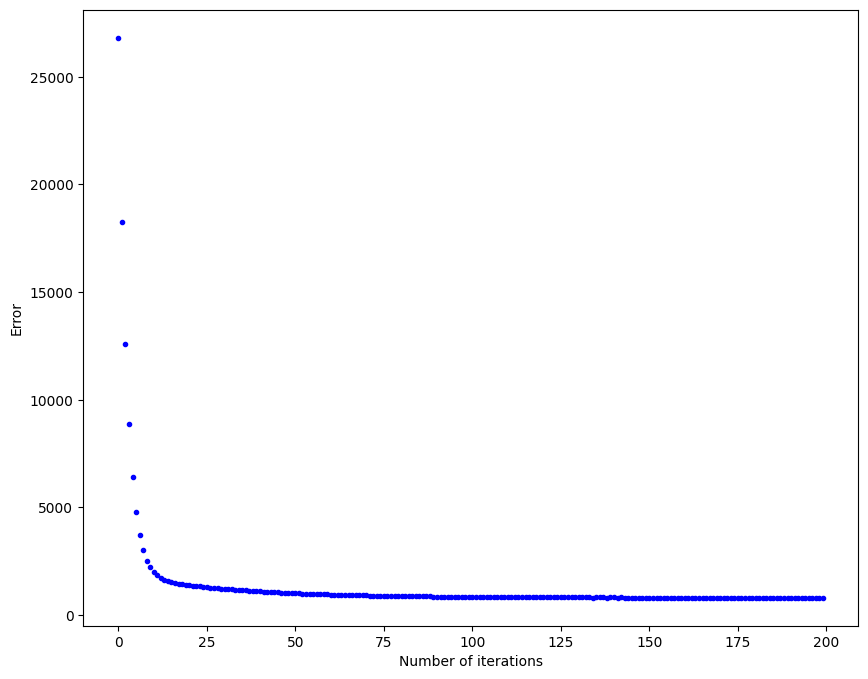

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

**Questions Set 1**

**1. Change batch size in mini-batch gradient descent.**


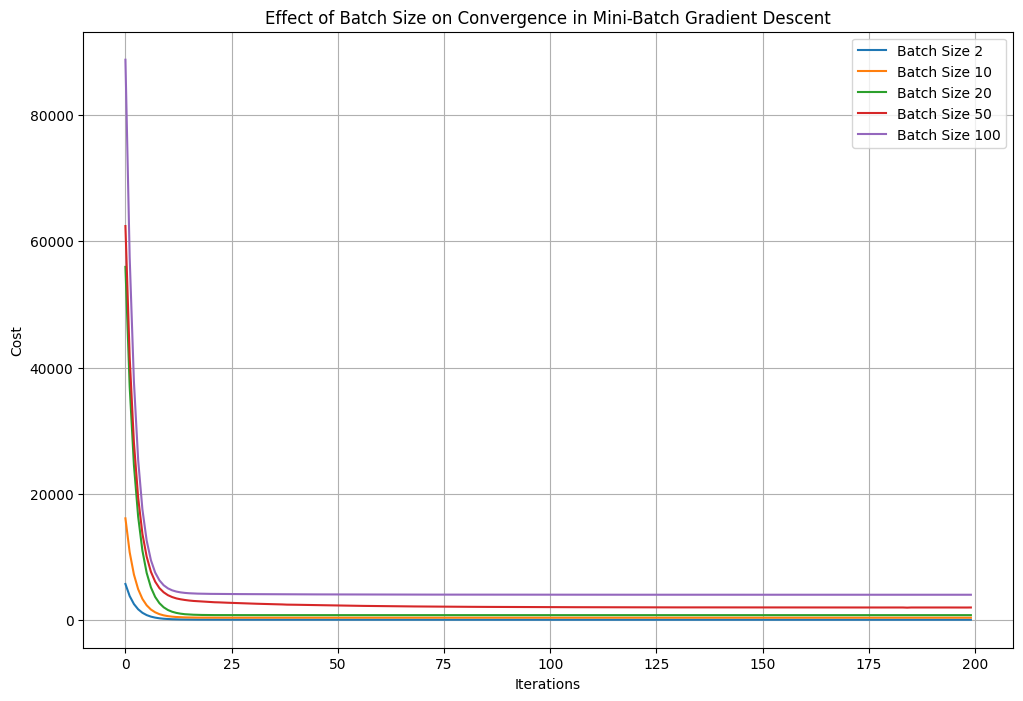

In [18]:
# Experiment with varying batch sizes
batch_sizes = [2, 10, 20, 50, 100]
results = {}

for batch_size in batch_sizes:
    y_pred = np.random.randn(2, 1)  # Initialize weights
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add bias term to feature matrix
    y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=200, batch_size=batch_size)
    results[batch_size] = cost_history

# Visualization
plt.figure(figsize=(12, 8))
for batch_size, cost_history in results.items():
    plt.plot(range(200), cost_history, label=f"Batch Size {batch_size}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Effect of Batch Size on Convergence in Mini-Batch Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

**2. Test all the three out on real datasets.**

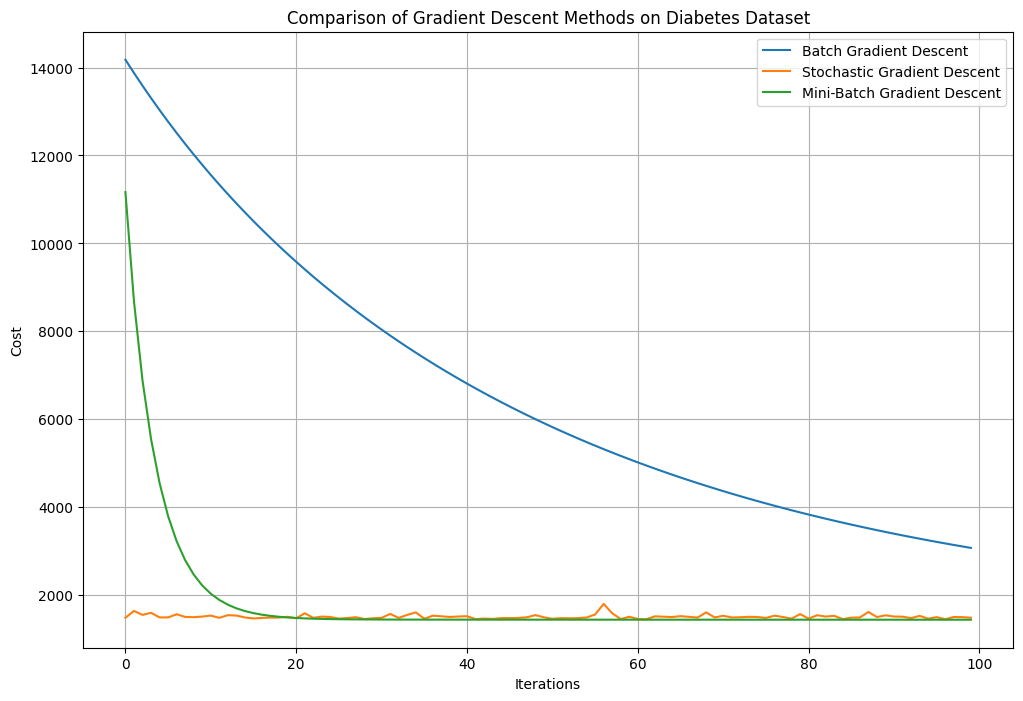

Batch Gradient Descent:
  Final Cost: 3072.7990
  Time Taken: 0.0031 seconds
Stochastic Gradient Descent:
  Final Cost: 1485.5960
  Time Taken: 0.7106 seconds
Mini-Batch Gradient Descent:
  Final Cost: 1438.7879
  Time Taken: 0.0277 seconds


In [22]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import time

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term to the feature matrix
X_b = np.c_[np.ones((len(X), 1)), X]

# Define the cost function
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        predictions = X.dot(y_pred)
        gradients = (1 / m) * X.T.dot(predictions - y)
        y_pred = y_pred - learning_rate * gradients
        cost_history[it] = cal_cost(y_pred, X, y)
    return y_pred, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            gradients = X_i.T.dot(X_i.dot(y_pred) - y_i)
            y_pred = y_pred - learning_rate * gradients
        cost_history[it] = cal_cost(y_pred, X, y)
    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]
            gradients = (1 / batch_size) * X_i.T.dot(X_i.dot(y_pred) - y_i)
            y_pred = y_pred - learning_rate * gradients
        cost_history[it] = cal_cost(y_pred, X, y)
    return y_pred, cost_history

# Experiment with all three methods
methods = {
    "Batch Gradient Descent": gradient_descent,
    "Stochastic Gradient Descent": stochastic_gradient_descent,
    "Mini-Batch Gradient Descent": minibatch_gradient_descent
}

results = {}
learning_rate = 0.01
iterations = 100

for method_name, method in methods.items():
    y_pred = np.random.randn(X_b.shape[1], 1)  # Random initialization
    start_time = time.time()
    if method_name == "Mini-Batch Gradient Descent":
        y_pred, cost_history = method(X_b, y, y_pred, learning_rate, iterations, batch_size=32)
    else:
        y_pred, cost_history = method(X_b, y, y_pred, learning_rate, iterations)
    end_time = time.time()
    results[method_name] = {
        "Final Cost": cost_history[-1],
        "Time Taken": end_time - start_time,
        "Cost History": cost_history
    }

# Visualization
plt.figure(figsize=(12, 8))
for method_name, result in results.items():
    plt.plot(range(iterations), result["Cost History"], label=method_name)

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Comparison of Gradient Descent Methods on Diabetes Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Print final results
for method_name, result in results.items():
    print(f"{method_name}:")
    print(f"  Final Cost: {result['Final Cost']:.4f}")
    print(f"  Time Taken: {result['Time Taken']:.4f} seconds")


**3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.**

<ipython-input-22-23c875e7662a>:24: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
<ipython-input-22-23c875e7662a>:48: RuntimeWarning: invalid value encountered in subtract
  y_pred = y_pred - learning_rate * gradients
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


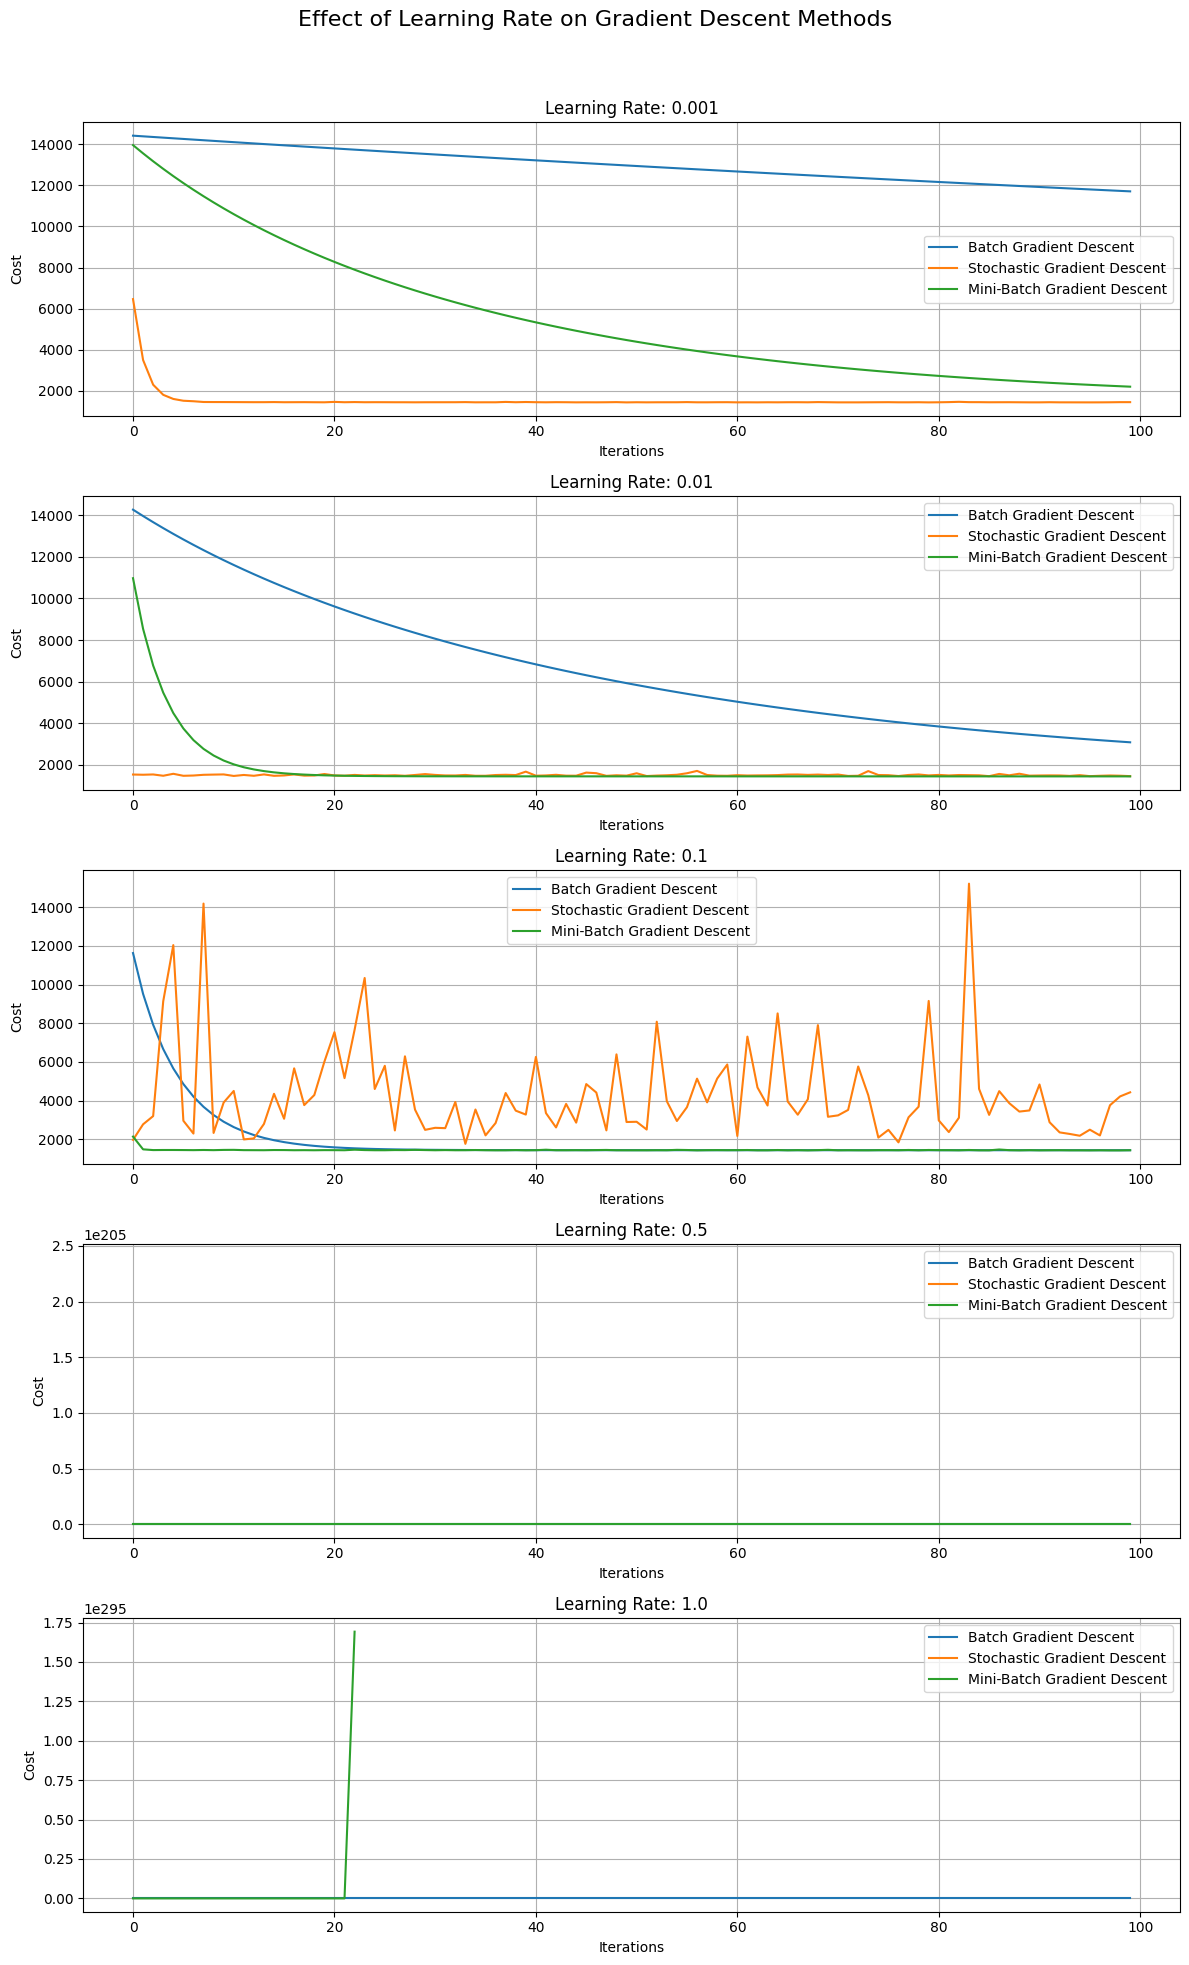

Learning Rate: 0.001
  Batch Gradient Descent:
    Final Cost: 11709.7913
    Time Taken: 0.0087 seconds
  Stochastic Gradient Descent:
    Final Cost: 1449.2577
    Time Taken: 0.5399 seconds
  Mini-Batch Gradient Descent:
    Final Cost: 2202.5406
    Time Taken: 0.0145 seconds
--------------------------------------------------
Learning Rate: 0.01
  Batch Gradient Descent:
    Final Cost: 3079.2529
    Time Taken: 0.0023 seconds
  Stochastic Gradient Descent:
    Final Cost: 1450.9330
    Time Taken: 0.4013 seconds
  Mini-Batch Gradient Descent:
    Final Cost: 1438.8641
    Time Taken: 0.0149 seconds
--------------------------------------------------
Learning Rate: 0.1
  Batch Gradient Descent:
    Final Cost: 1439.4091
    Time Taken: 0.0023 seconds
  Stochastic Gradient Descent:
    Final Cost: 4430.8615
    Time Taken: 0.4362 seconds
  Mini-Batch Gradient Descent:
    Final Cost: 1439.5035
    Time Taken: 0.0145 seconds
--------------------------------------------------
Learning 

In [23]:
# Experiment: Changing learning rate for BGD, SGD, and MBGD

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]  # Different learning rates to test
results_lr = {}

# Iterate over each learning rate for all methods
for lr in learning_rates:
    results_lr[lr] = {}
    for method_name, method in methods.items():
        y_pred = np.random.randn(X_b.shape[1], 1)  # Random initialization
        start_time = time.time()
        if method_name == "Mini-Batch Gradient Descent":
            y_pred, cost_history = method(X_b, y, y_pred, lr, iterations, batch_size=32)
        else:
            y_pred, cost_history = method(X_b, y, y_pred, lr, iterations)
        end_time = time.time()
        results_lr[lr][method_name] = {
            "Final Cost": cost_history[-1],
            "Time Taken": end_time - start_time,
            "Cost History": cost_history
        }

# Visualization: Cost history for each learning rate and method
fig, axs = plt.subplots(len(learning_rates), 1, figsize=(12, len(learning_rates) * 4))
fig.suptitle("Effect of Learning Rate on Gradient Descent Methods", fontsize=16)

for idx, lr in enumerate(learning_rates):
    ax = axs[idx]
    for method_name, result in results_lr[lr].items():
        ax.plot(range(iterations), result["Cost History"], label=method_name)
    ax.set_title(f"Learning Rate: {lr}")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Cost")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print final results for each learning rate and method
for lr, methods_result in results_lr.items():
    print(f"Learning Rate: {lr}")
    for method_name, result in methods_result.items():
        print(f"  {method_name}:")
        print(f"    Final Cost: {result['Final Cost']:.4f}")
        print(f"    Time Taken: {result['Time Taken']:.4f} seconds")
    print("-" * 50)


**Questions Set 2**

**Which of the following is TRUE, given the optimal learning rate?**

**(i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.**

**(ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.**

**(iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.**

**(iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.**

**(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.**

**(vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.**

(i) False, this is true only for convex loss functions. For non-convex loss functions (e.g., deep neural networks with multiple local minima), Batch Gradient Descent (BGD) may converge to a local minimum or saddle point instead of the global optimum.

(ii) False, Stochastic Gradient Descent (SGD) can fail to converge without careful learning rate schedules or in cases where the loss function is non-convex.

(iii) False, both BGD and SGD can converge to the global optimum for convex loss functions. SGD requires appropriate learning rate schedules, but when used correctly, it can also converge.

(iv) False, BGD is guaranteed to converge for convex loss functions with the proper learning rate.

(v) True, for convex functions, both methods converge to the global optimum under proper conditions (e.g., correct learning rates for BGD and diminishing learning rates for SGD).

(vi) False, convexity ensures convergence to the global optimum under proper conditions.
